In [ ]:
first_run = False

if 'google.colab' in str(get_ipython()):
  print("Running in colab...")
  
  !pip install h2o
  !pip install matplotlib
  !pip install sklearn

  from google.colab import drive
  drive.mount('/content/drive')
  
  dataset_path = '/content/drive/MyDrive/Repasse Gui/dataset_anonymized/train-val_stratified_2C.csv'

else:
  if first_run:
    !pip install h2o
    !pip install pandas
    !pip install sklearn
    !pip install matplotlib
    
  dataset_path = "../dataset_anonymized/train-val_stratified.csv"
  print("Running locally...")

Running in colab...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.1 MB 25 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=6e3baa9aa5b14c776b8cc77f30a6ce6d2d0dd33a24798db8f752a1ef21551b1c
  Stored in directory: /root/.cache/pip/wheels/02/f9/18/5fbae4db903beda26f764b6e035cb41b37713fed8a6b9cd403
Successfully built h2o
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=2d0f11d1dd75fcfeb75362a1ab6dd79568f654f9be81618da77a025f451de625
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder

# Aux functions

In [ ]:
from matplotlib import pyplot
import numpy as np

In [ ]:
def plot_importance(importances=None, features=None):
    indices = np.argsort(importances)

    pyplot.title('Feature Importances')
    pyplot.barh(range(len(indices)), importances[indices], color='b', align='center')
    pyplot.yticks(range(len(indices)), [features[i] for i in indices])
    pyplot.xlabel('Relative Importance')
    pyplot.show()

# Import dataset that has all features

In [ ]:
# From https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline.html#choosing-an-encoding-strategy.
# On city feature we will use one hot encoding for feature selection since we use linear estimators.
# When finding models for IA Level we'll use Ordinal Encoder.

# On ia level feature we will always use Label encoder

In [ ]:
df_all_features = pd.read_csv(dataset_path ,index_col=[0]) 
# df_all_features.columns

In [ ]:
# city_encoder = OneHotEncoder()
# city_enc = city_encoder.fit_transform(df_all_features["city"].to_numpy().reshape(-1, 1))
# # city_enc.todense()

# city_enc_df = pd.DataFrame(city_enc.todense(), columns=city_encoder.categories_[0])

# df_all_features.reset_index(drop=True, inplace=True)
# city_enc_df.reset_index(drop=True, inplace=True)

# df_all_features = pd.concat([df_all_features, city_enc_df], axis=1)

# # To reverse the encoding:
# # decoded = city_encoder.inverse_transform(city_enc)

In [ ]:
city_encoder = LabelEncoder()
city_enc = city_encoder.fit_transform(df_all_features["city"])
df_all_features["city enc"] = city_enc

In [ ]:
ia_level_encoder = LabelEncoder()
ia_level_enc = ia_level_encoder.fit_transform(df_all_features["ia level"])
df_all_features["ia level enc"] = ia_level_enc #nao grave = 1; grave = 0

# To reverse the encoding:
# decoded = ia_level_encoder.inverse_transform(ia_level_enc)

In [ ]:
df_all_features.drop(["ia level", "Y", "city", "city enc", "city_enc", 'A senhora ou sua família recebem algum benefício do governo do Estado do Ceará (poderá marcar mais de uma resposta)_x', 'Nos últimos 12 meses, alguém no seu domicílio fez algum curso de qualificação?', 'Qual a forma de iluminação utilizada no domicílio? (marque o mais utilizado)'], axis=1, inplace=True)
df_all_features

,"Nos últimos 3 meses o(a) Sr(a) teve a preocupação de que a comida na sua casa acabasse antes que tivesse condição de comprar, receber ou produzir mais comida?",Nos últimos 3 meses a comida acabou antes que o(a) Sr(a) tivesse dinheiro para comprar mais?,"Nos últimos 3 meses, o(a) Sr(a) alguma vez comeu menos do que achou que devia porque não havia dinheiro suficiente para comprar comida?","Nos últimos 3 meses, o(a) Sr(a) ficou sem dinheiro para ter uma alimentação saudável e variada?","Nos últimos 3 meses, o(a) Sr(a) ou algum adulto em sua casa diminuiu, alguma vez, a quantidade de alimentos nas refeições, ou pulou refeições, porque não havia dinheiro suficiente para comprar a comida?",Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?,Você cria animais que são utilizados para consumo da sua família?,Você planta alimentos que são utilizados para consumo da sua família?,"Atualmente, alguém no seu domicílio tem algum trabalho remunerado?","Se sim, quantos trabalham?",...,Qual é a forma de abastecimento de água utilizada no domicílio?,O domicílio possui água canalizada em pelo menos um cômodo?,A água utilizada para beber neste domicílio é:,"No domicílio, existe banheiro ou sanitário?",O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?,"Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?","Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?","Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?",O domicílio está localizado em área de conflito/violência?,ia level enc
29857,0,1,0,0,0,1,0,0,0,0.000000,...,1,1,1,1,1,0,0,0,1,1
10308,0,0,0,0,0,0,0,0,0,0.000000,...,1,0,1,1,1,0,0,0,1,0
29599,1,1,1,1,1,0,1,1,0,0.000000,...,0,1,0,1,0,0,0,0,1,1
29965,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,1,1,0,0,0,0,0
10959,0,0,0,0,0,0,0,0,0,0.000000,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34048,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,1,0,0,0,0,1,0
18599,0,0,0,0,1,0,0,1,0,0.000000,...,0,1,1,1,0,0,0,0,1,0
10056,1,1,1,0,1,0,0,1,1,0.166667,...,1,1,0,0,1,1,0,0,1,1
14738,0,1,1,0,1,1,0,0,0,0.000000,...,0,1,1,1,1,0,0,0,1,1


# Using 'SelectFromModel'

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

Classification Estimators: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

In [ ]:
X_sanity_check = df_all_features.drop(["ia level enc"], axis=1)
y = df_all_features["ia level enc"]

## Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)

In [ ]:
from sklearn.linear_model import LogisticRegression

Teste mínimo para ver se o estimador obtem o que gerou o Y

In [ ]:
sfm_selector = SelectFromModel(estimator=LogisticRegression(max_iter=10000))
sfm_selector.fit(X_sanity_check, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X_sanity_check, y)}")
print(f"Main features:")
display(X_sanity_check.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

Average Accuracy: 0.6953861418885398
Main features:


Index(['Nos últimos 3 meses o(a) Sr(a) teve a preocupação de que a comida na sua casa acabasse antes que tivesse condição de comprar, receber ou produzir mais comida?',
       'Nos últimos 3 meses, o(a) Sr(a) alguma vez comeu menos do que achou que devia porque não havia dinheiro suficiente para comprar comida?',
       'Nos últimos 3 meses, o(a) Sr(a) ficou sem dinheiro para ter uma alimentação saudável e variada?',
       'Nos últimos 3 meses, o(a) Sr(a) ou algum adulto em sua casa diminuiu, alguma vez, a quantidade de alimentos nas refeições, ou pulou refeições, porque não havia dinheiro suficiente para comprar a comida?',
       'Você acha que após a COVID houve uma mudança na disponibilidade de alimentos para a sua família?',
       'creas', 'A água utilizada para beber neste domicílio é:'],
      dtype='object')

Aplica feature selection properly

In [ ]:
X = X_sanity_check.drop(X_sanity_check.columns[0:8], axis=1)
X

,"Atualmente, alguém no seu domicílio tem algum trabalho remunerado?","Se sim, quantos trabalham?","Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)",Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?,cras,creas,A casa onde a família mora é:,Qual é o material predominante na construção das paredes externas no domicílio?,Qual é a forma de abastecimento de água utilizada no domicílio?,O domicílio possui água canalizada em pelo menos um cômodo?,A água utilizada para beber neste domicílio é:,"No domicílio, existe banheiro ou sanitário?",O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?,"Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?","Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?","Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?",O domicílio está localizado em área de conflito/violência?
29857,0,0.000000,0.309406,1,0,0,1,0,1,1,1,1,1,0,0,0,1
10308,0,0.000000,0.412541,1,1,0,1,0,1,0,1,1,1,0,0,0,1
29599,0,0.000000,0.412541,0,0,0,1,0,0,1,0,1,0,0,0,0,1
29965,0,0.000000,0.278878,1,1,0,1,1,0,0,0,1,1,0,0,0,0
10959,0,0.000000,0.453795,1,0,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34048,0,0.000000,0.412541,1,0,0,1,0,0,0,0,1,0,0,0,0,1
18599,0,0.000000,0.412541,1,0,0,1,0,0,1,1,1,0,0,0,0,1
10056,1,0.166667,0.387789,0,1,0,1,1,1,1,0,0,1,1,0,0,1
14738,0,0.000000,0.495050,1,0,0,1,1,0,1,1,1,1,0,0,0,1


### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=LogisticRegression(max_iter=10000))
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 10000,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.6705804531172482
Main features:


Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'creas', 'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## LogisticRegressionCV

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV

This class implements logistic regression using liblinear, newton-cg, sag of lbfgs optimizer. The newton-cg, sag and lbfgs solvers support only L2 regularization with primal formulation. The liblinear solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. Elastic-Net penalty is only supported by the saga solver.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

estimator = LogisticRegressionCV(max_iter=10000)

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__Cs': 10,
 'estimator__class_weight': None,
 'estimator__cv': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1.0,
 'estimator__l1_ratios': None,
 'estimator__max_iter': 10000,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__refit': True,
 'estimator__scoring': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator': LogisticRegressionCV(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.672862576484207
Main features:


Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## PassiveAggressiveClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

estimator = PassiveAggressiveClassifier(max_iter=10000)

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__C': 1.0,
 'estimator__average': False,
 'estimator__class_weight': None,
 'estimator__early_stopping': False,
 'estimator__fit_intercept': True,
 'estimator__loss': 'hinge',
 'estimator__max_iter': 10000,
 'estimator__n_iter_no_change': 5,
 'estimator__n_jobs': None,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__tol': 0.001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': PassiveAggressiveClassifier(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.6531833967256491
Main features:


Index(['Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas', 'A casa onde a família mora é:',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'A água utilizada para beber neste domicílio é:',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

## Perceptron

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

estimator = Perceptron(max_iter=10000)

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__alpha': 0.0001,
 'estimator__class_weight': None,
 'estimator__early_stopping': False,
 'estimator__eta0': 1.0,
 'estimator__fit_intercept': True,
 'estimator__l1_ratio': 0.15,
 'estimator__max_iter': 10000,
 'estimator__n_iter_no_change': 5,
 'estimator__n_jobs': None,
 'estimator__penalty': None,
 'estimator__random_state': 0,
 'estimator__shuffle': True,
 'estimator__tol': 0.001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': Perceptron(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.6123036216305606
Main features:


Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## RidgeClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

estimator = RidgeClassifier(max_iter=10000)

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__alpha': 1.0,
 'estimator__class_weight': None,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 10000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__random_state': None,
 'estimator__solver': 'auto',
 'estimator__tol': 0.001,
 'estimator': RidgeClassifier(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.6708119728791136
Main features:


Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'creas', 'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## RidgeClassifierCV

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html#sklearn.linear_model.RidgeClassifierCV

In [ ]:
from sklearn.linear_model import RidgeClassifierCV

estimator = RidgeClassifierCV()

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__alphas': array([ 0.1,  1. , 10. ]),
 'estimator__class_weight': None,
 'estimator__cv': None,
 'estimator__fit_intercept': True,
 'estimator__normalize': 'deprecated',
 'estimator__scoring': None,
 'estimator__store_cv_values': False,
 'estimator': RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.671010418389284
Main features:


Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'creas', 'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## SGDClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

estimator = SGDClassifier(max_iter=10000)

### Top n features

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
# plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

{'estimator__alpha': 0.0001,
 'estimator__average': False,
 'estimator__class_weight': None,
 'estimator__early_stopping': False,
 'estimator__epsilon': 0.1,
 'estimator__eta0': 0.0,
 'estimator__fit_intercept': True,
 'estimator__l1_ratio': 0.15,
 'estimator__learning_rate': 'optimal',
 'estimator__loss': 'hinge',
 'estimator__max_iter': 10000,
 'estimator__n_iter_no_change': 5,
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__tol': 0.001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': SGDClassifier(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Average Accuracy: 0.672862576484207
Main features:


Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'A água utilizada para beber neste domicílio é:',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?'],
      dtype='object')

## SGDOneClassSVM

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDOneClassSVM.html#sklearn.linear_model.SGDOneClassSVM

In [ ]:
from sklearn.linear_model import SGDOneClassSVM

estimator = SGDOneClassSVM(max_iter=10000)

### Top n features

{'estimator__average': False,
 'estimator__eta0': 0.0,
 'estimator__fit_intercept': True,
 'estimator__learning_rate': 'optimal',
 'estimator__max_iter': 10000,
 'estimator__nu': 0.5,
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__tol': 0.001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': SGDOneClassSVM(max_iter=10000),
 'importance_getter': 'auto',
 'max_features': None,
 'norm_order': 1,
 'prefit': False,
 'threshold': None}

Main features:


Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

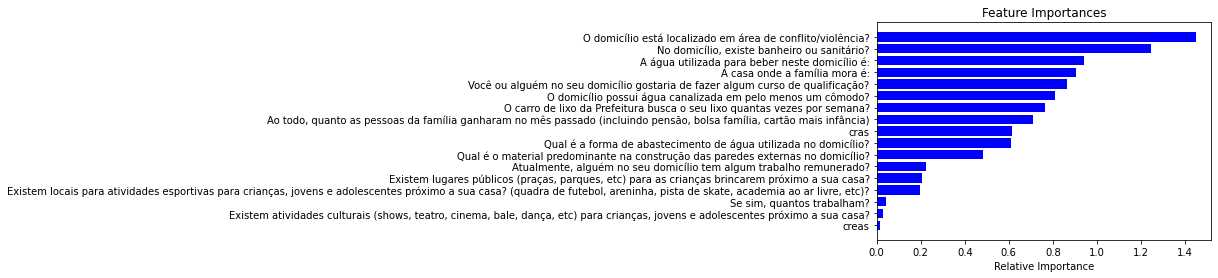

In [ ]:
sfm_selector = SelectFromModel(estimator=estimator)
display(sfm_selector.get_params())
sfm_selector.fit(X, y)

# print(f"Average Accuracy: {sfm_selector.estimator_.score(X, y)}")
print(f"Main features:")
display(X.columns[sfm_selector.get_support()])
plot_importance(importances=sfm_selector.estimator_.coef_, features=sfm_selector.feature_names_in_)

# Boruta Model Selection

Info: https://towardsdatascience.com/feature-selection-you-are-probably-doing-it-wrong-985679b41456

https://github.com/smazzanti/tds_feature_selection_you_are_probably_doing_it_wrong/blob/main/tds_feature_selection_you_are_probably_doing_it_wrong.ipynb

In [ ]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.3 MB/s 


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_jobs = -1, max_depth = 5)

In [ ]:
boruta_selector = BorutaPy(forest, n_estimators = 'auto', random_state = 0)
boruta_selector.fit(np.array(X), np.array(df_all_features["ia level enc"]))

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=80,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x7FA219111D10),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FA219111D10)

In [ ]:
feature_names = X.columns
# store results
boruta_ranking = boruta_selector.ranking_
selected_features = np.array(feature_names)[boruta_ranking <= 2]
selected_features

array(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'cras',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype=object)

In [ ]:
# print(f"Average Accuracy: {boruta_selector.estimator.score(np.array(X), np.array(df_all_features["Y"]))}")
# np.array(X), np.array(df_all_features["Y"])

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


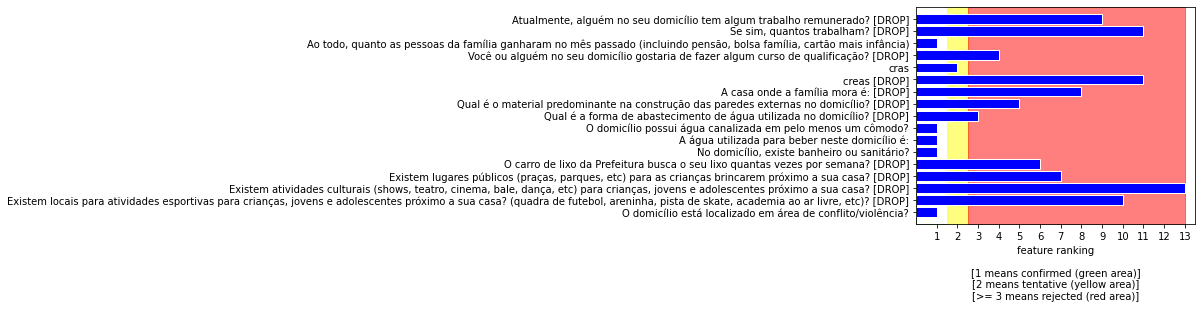

In [ ]:
fig, ax = plt.subplots(figsize = (5, 4))

ax.barh(range(len(feature_names)), boruta_ranking, color = 'blue', edgecolor = 'white')
ax.fill_between([0, 1.5, -1], len(feature_names), color='green', alpha = .5)
ax.fill_between([1.5, 2.5], -1, len(feature_names), color = 'yellow', alpha = .5)
ax.fill_between([2.5, 13], -1, len(feature_names), color = 'red', alpha = .5)
ax.set_yticks(range(len(feature_names)))
ax.set_yticklabels([feature_name + ' [DROP]' if boruta_ranking[i] > 2 else feature_name for i, feature_name in enumerate(feature_names)])
ax.set_xlim(0, boruta_ranking.max() + .5)
ax.set_ylim(-1, len(feature_names))
ax.set_xticks(range(1, boruta_ranking.max() + 1))
ax.set_xlabel('feature ranking\n\n[1 means confirmed (green area)]\n[2 means tentative (yellow area)]\n[>= 3 means rejected (red area)]')
ax.invert_yaxis()

plt.tight_layout()

# SFS (Forward and Backward)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

## RidgeClassifier

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier

estimator = RidgeClassifier(max_iter=10000)

### Forward

In [ ]:

sfs_selector = SequentialFeatureSelector(estimator=estimator, n_features_to_select = 4, cv =10)
sfs_selector.fit(X, y)

# print(f"Average Accuracy: {sfs_selector.estimator.score(X, y)}")
print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

# plot_importance(importances=sfs_selector.estimator.coef_, features=sfs_selector.feature_names_in_)

Main features:


{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?'],
      dtype='object')

In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=estimator, cv =10)
sfs_selector.fit(X, y)

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'No domicílio, existe banheiro ou sanitário?'],
      dtype='object')

### Backward

In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=estimator, n_features_to_select = 4, cv =10, direction ='backward')
sfs_selector.fit(X, y)
X.columns[sfs_selector.get_support()]

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:'],
      dtype='object')

In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=estimator, cv =10, direction ='backward')
sfs_selector.fit(X, y)
X.columns[sfs_selector.get_support()]

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(max_iter=10000)

### Forward

In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=estimator, n_features_to_select = 4, cv =10)
sfs_selector.fit(X, y)

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?'],
      dtype='object')

In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=estimator, cv =10)
sfs_selector.fit(X, y)

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'No domicílio, existe banheiro ou sanitário?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

### Backward

In [ ]:
# Took 1h to run this cell

sfs_selector = SequentialFeatureSelector(estimator=estimator, n_features_to_select = 4, cv =10, direction ='backward', n_jobs=-1)
sfs_selector.fit(X, y)

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:'],
      dtype='object')

In [ ]:
#Took 45min to run
sfs_selector = SequentialFeatureSelector(estimator=estimator, cv =10, direction ='backward', n_jobs=-1)
sfs_selector.fit(X, y)

print(f"Main features:")
display(sfs_selector.estimator.get_params())
display(X.columns[sfs_selector.get_support()])

Main features:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

#Select K Best

## Chi2
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### 1

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=1)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 1,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?'], dtype='object')

### 2

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=2)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 2,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?', 'O domicílio possui água canalizada em pelo menos um cômodo?'], dtype='object')

###3

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=3)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 3,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:'],
      dtype='object')

###4

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=4)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 4,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###5

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=5)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 5,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###6

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=6)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 6,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###7

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=7)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 7,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###8

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=8)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 8,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###9

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=9)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 9,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###10

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=10)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 10,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###11

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=11)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 11,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###12

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=12)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 12,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###13

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=13)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 13,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em área d

###14

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=14)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 14,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?', 'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domic

###15

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=15)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 15,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua c

###16

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=16)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 16,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescen

###17

In [ ]:
select_k_best = SelectKBest(score_func=chi2, k=17)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 17,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) 

## F_classif
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

###1

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=1)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 1,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['O domicílio possui água canalizada em pelo menos um cômodo?'], dtype='object')

###2

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=2)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 2,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['O domicílio possui água canalizada em pelo menos um cômodo?', 'A água utilizada para beber neste domicílio é:'], dtype='object')

###3

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=3)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 3,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?'],
      dtype='object')

###4

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=4)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 4,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?'],
      dtype='object')

###5

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=5)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 5,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###6

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=6)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 6,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###7

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=7)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 7,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###8

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=8)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 8,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###9

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=9)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 9,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###10

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=10)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 10,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###11

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=11)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 11,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em área de conflito/violência?'],
      dtype='object')

###12

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=12)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 12,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está localizado em áre

###13

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=13)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 13,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?',
       'O domicílio está lo

###14

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=14)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 14,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de fut

###15

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=15)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 15,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próxi

###16

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=16)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 16,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescen

###17

In [ ]:
select_k_best = SelectKBest(score_func=f_classif, k=17)
select_k_best.fit(X, y)

print(f"Main features:")
display(select_k_best.get_params())
display(X.columns[select_k_best.get_support()])

Main features:


{'k': 17,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) 

# Recursive Feature Elimination (RFE)

## Decision Tree Classifier

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

###1

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 1,
 'step': 1,
 'verbose': 0}

Index(['Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)'], dtype='object')

###2

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 2,
 'step': 1,
 'verbose': 0}

Index(['Se sim, quantos trabalham?', 'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)'], dtype='object')

###3

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 3,
 'step': 1,
 'verbose': 0}

Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'A casa onde a família mora é:'],
      dtype='object')

###4

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=4)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 4,
 'step': 1,
 'verbose': 0}

Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'A casa onde a família mora é:'],
      dtype='object')

###5

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 5,
 'step': 1,
 'verbose': 0}

Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'A casa onde a família mora é:',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?'],
      dtype='object')

###6

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 6,
 'step': 1,
 'verbose': 0}

Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?'],
      dtype='object')

###7

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 7,
 'step': 1,
 'verbose': 0}

Index(['Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?'],
      dtype='object')

###8

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 8,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?'],
      dtype='object')

###9

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=9)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 9,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?'],
      dtype='object')

###10

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 10,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###11

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=11)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 11,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, areninha, pista de skate, academia ao ar livre, etc)?'],
      dtype='object')

###12

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=12)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 12,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, aren

###13

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=13)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 13,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianças, jovens e adolescentes próximo a sua casa? (quadra de futebol, aren

###14

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=14)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 14,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       'Existem locais para atividades esportivas para crianç

###15

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 15,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para crianças, jovens e adolescentes próximo a sua casa?',
       

###16

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=16)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 16,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) para cria

###17

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=17)
rfe.fit(X, y)

print(f"Main features:")
display(rfe.get_params())
display(X.columns[rfe.get_support()])

Main features:


{'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'importance_getter': 'auto',
 'n_features_to_select': 17,
 'step': 1,
 'verbose': 0}

Index(['Atualmente, alguém no seu domicílio tem algum trabalho remunerado?',
       'Se sim, quantos trabalham?',
       'Ao todo, quanto as pessoas da família ganharam no mês passado (incluindo pensão, bolsa família, cartão mais infância)',
       'Você ou alguém no seu domicílio gostaria de fazer algum curso de qualificação?',
       'cras', 'creas', 'A casa onde a família mora é:',
       'Qual é o material predominante na construção das paredes externas no domicílio?',
       'Qual é a forma de abastecimento de água utilizada no domicílio?',
       'O domicílio possui água canalizada em pelo menos um cômodo?',
       'A água utilizada para beber neste domicílio é:',
       'No domicílio, existe banheiro ou sanitário?',
       'O carro de lixo da Prefeitura busca o seu lixo quantas vezes por semana?',
       'Existem lugares públicos (praças, parques, etc) para as crianças brincarem próximo a sua casa?',
       'Existem atividades culturais (shows, teatro, cinema, bale, dança, etc) 